# Exercise 2 Solution: Distributions and Point Estimation

In this exercise, we explore key concepts in probability distributions and point estimation, which are essential for analyzing neuroscience data. Accurately estimating parameters such as mean firing rate, EEG amplitude variability, or synaptic weight distributions helps in understanding underlying neural mechanisms.

Specifically, we will:
1. **Common Families of Distributions**: Examine normal, Poisson, and exponential distributions with real-world neuroscience applications.
2. **Point Estimation**: Compute estimators for population parameters (mean, variance) using sample data.
3. **Biased vs. Unbiased Estimators**: Compare the differences and implications of using biased vs. unbiased variance estimators in fMRI data.
4. **Maximum Likelihood Estimation (MLE) in Neuroscience**: Use MLE to estimate neuronal firing probabilities and synaptic weight distributions.

By the end of this exercise, we will understand how to select appropriate distributions and estimate parameters efficiently.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Example 1: EEG Signal Amplitude Distribution

In [19]:
mu = 50  # Mean EEG amplitude in µV
sigma = 30  # Variance

# Simulate EEG amplitudes
eeg_amplitudes = np.random.normal(mu, np.sqrt(sigma), 10000)


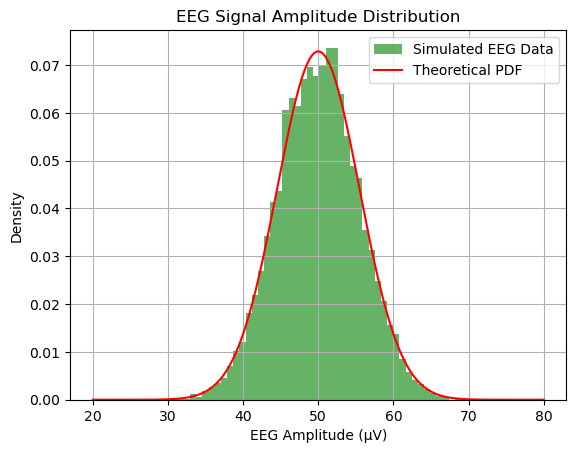

In [20]:
# Plot histogram and theoretical PDF
x = np.linspace(20, 80, 1000)
pdf_values = norm.pdf(x, loc=mu, scale=np.sqrt(sigma))

plt.hist(eeg_amplitudes, bins=50, density=True, alpha=0.6, color='g', label="Simulated EEG Data")
plt.plot(x, pdf_values, label="Theoretical PDF", color="red")
plt.xlabel("EEG Amplitude (µV)")
plt.ylabel("Density")
plt.title("EEG Signal Amplitude Distribution")
plt.legend()
plt.grid()
plt.show()

## Example 2: Estimating Spike Rate of Neurons (unbiased estimator)

In [21]:
# Observed spike counts in 10 trials
spike_counts = np.array([5, 7, 6, 8, 5, 6, 7, 9, 4, 6])

# Q1: Compute point estimation mean
mean_spike_rate = np.mean(spike_counts)
# Q2: Compute the point estimation variance
variance_spike_rate = np.var(spike_counts, ddof=1)  # Unbiased estimate

print(f"Estimated Mean Spike Rate: {mean_spike_rate:.2f} spikes per trial")
print(f"Estimated Variance of Spike Counts: {variance_spike_rate:.2f}")

Estimated Mean Spike Rate: 6.30 spikes per trial
Estimated Variance of Spike Counts: 2.23


## Example 3: Estimating Resting-State fMRI Signal (unbiased VS. unbiased estimator)

In [22]:
# Observed fMRI signal intensities
fmri_signals = np.array([98, 102, 100, 99, 101])

# Biased variance estimate (dividing by N)
biased_variance = np.var(fmri_signals, ddof=0)

# Unbiased variance estimate (dividing by N-1)
unbiased_variance = np.var(fmri_signals, ddof=1)

print(f"Biased Variance Estimate: {biased_variance:.2f}")
print(f"Unbiased Variance Estimate: {unbiased_variance:.2f}")


Biased Variance Estimate: 2.00
Unbiased Variance Estimate: 2.50


## Example 4:  Estimating Neuron Response Probability

In [23]:
# Given data
firing_trials = 60
total_trials = 100

# Compute MLE estimate
theta_mle = firing_trials / total_trials


In [24]:
# Prior belief: theta follows a normal distribution with mean 0.55 and variance 0.02
prior_mu = 0.55
prior_variance = 0.02  # Variance of prior belief

# Compute MAP estimate
posterior_variance = 1 / (total_trials / (theta_mle * (1 - theta_mle)) + 1 / prior_variance)
posterior_mu = posterior_variance * (firing_trials / (theta_mle * (1 - theta_mle)) + prior_mu / prior_variance)


In [25]:
# Print results
print(f"MLE estimate of neuron firing probability: {theta_mle:.3f}")
print(f"MAP estimate of neuron firing probability: {posterior_mu:.3f}")

MLE estimate of neuron firing probability: 0.600
MAP estimate of neuron firing probability: 0.595
